<a href="https://colab.research.google.com/github/eitanfass/Tomato_quality/blob/main/GRVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import skimage.io as io # io is an input output moduile, as part of skimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from skimage.util import img_as_float
import glob

def GRVI(img_path):
  img=io.imread(img_path)
  img = img_as_float(img)
  return img,(img[:,:,1]-img[:,:,0])/(img[:,:,1]+img[:,:,0])
def show_index(img,index,index_name=''):
  
  # define figure size: width 10 and height 15
  plt.figure(figsize=(10, 15))

  # subplot for the RGB
  ax1 = plt.subplot(121, title='Original RGB')
  im1 = ax1.imshow(img) 

  # subplot for the index
  ax2 = plt.subplot(122, title=f'{index_name} index, mean={np.nanmean(index):.3f}') # notice the position, and the title
  im2 = ax2.imshow(index,cmap='RdYlGn') 


  # add colorbar only to the image on the right
  divider = make_axes_locatable(ax2)
  colorbar_ax = divider.append_axes("right", size="5%", pad=0.05)  
  plt.colorbar(im2, cax=colorbar_ax)


<ipython-input-12-c33b78972358>:16: RuntimeWarning: invalid value encountered in true_divide
  return img,(img[:,:,1]-img[:,:,0])/(img[:,:,1]+img[:,:,0])


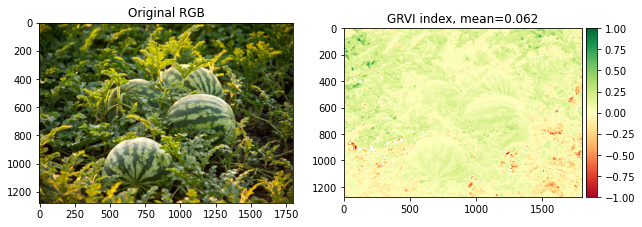

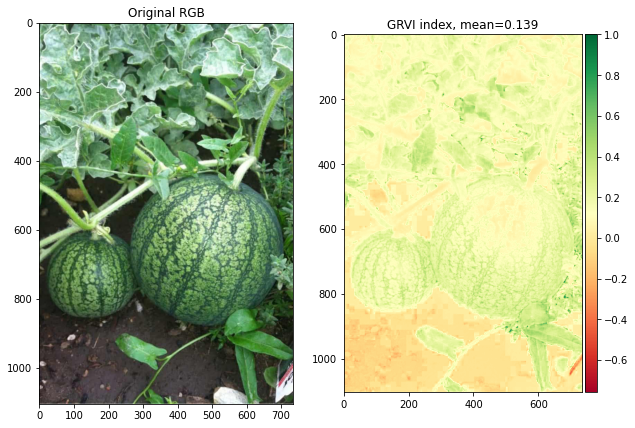

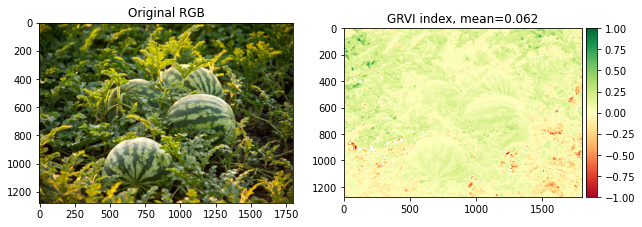

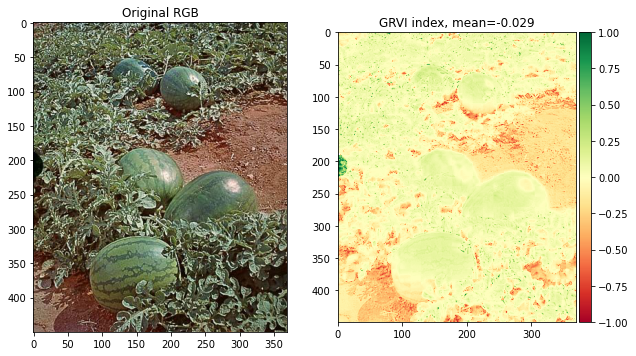

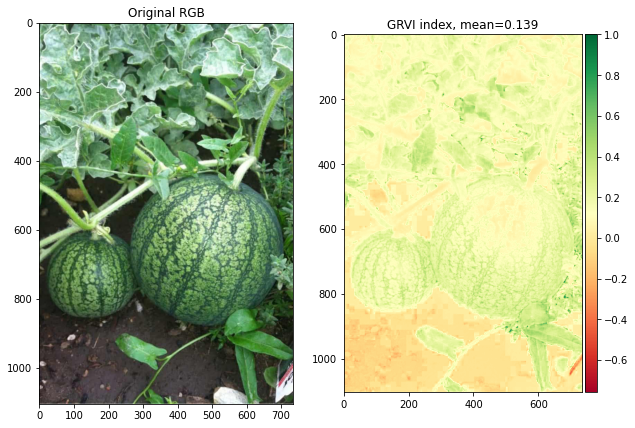

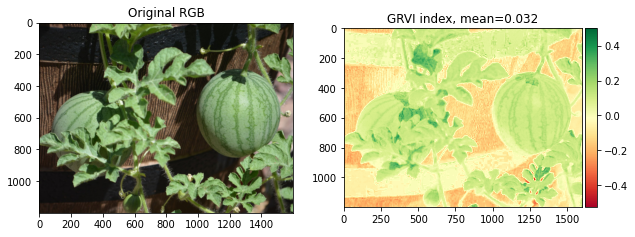

In [17]:
img_folder_path='/content/drive/MyDrive/saved_imgs/watermelon plant'
path_list = glob.glob(f'{img_folder_path}/*.*') 
for path in path_list:
  img,index=GRVI(path)
  show_index(img,index,index_name='GRVI')